In [ ]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

import sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
#An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5).
#After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market.Content 
#In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). 
#Then, they performed segmented outreach and communication for different segment of customers.
#This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers.
#You are required to help the manager to predict the right group of the new customers.#

In [ ]:
data=pd.read_csv("customersegmentation.csv")

In [ ]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458982,Male,Yes,61,Yes,Executive,1.0,High,3.0,Cat_6,C
1,458983,Female,Yes,63,Yes,Executive,0.0,High,5.0,Cat_6,C
2,458984,Male,Yes,39,Yes,Artist,0.0,Average,3.0,Cat_6,C
3,458985,Male,No,23,No,Healthcare,1.0,Low,4.0,Cat_6,D
4,458986,Male,No,18,No,Healthcare,7.0,Low,4.0,Cat_6,D


In [ ]:
data.shape

(10695, 11)

In [ ]:
# Looking for missing values in dataset

data.isna().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [ ]:
data = data.dropna()
data.shape

(8819, 11)

In [ ]:
data.isna().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

Gender Data Visualisation

In [ ]:
data['Gender'].dtype

dtype('O')

In [ ]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
data['Gender'].value_counts()

Male      4861
Female    3958
Name: Gender, dtype: int64

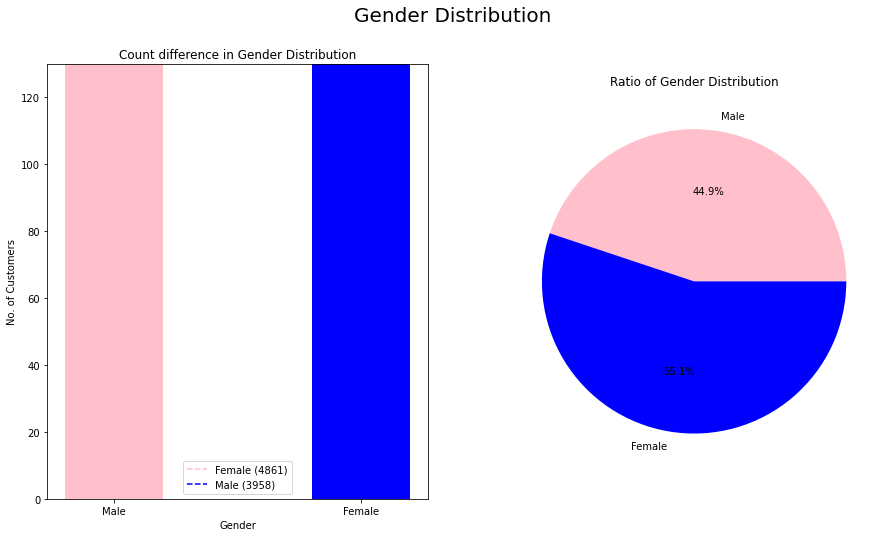

In [ ]:
labels=data['Gender'].unique()
values=data['Gender'].value_counts(ascending=True)


fig, (ax0,ax1) = plt.subplots(ncols=2,figsize=(15,8))
bar = ax0.bar(x=labels, height=values, width=0.4, align='center', color=['pink','blue'])
ax0.set(title='Count difference in Gender Distribution',xlabel='Gender', ylabel='No. of Customers')
ax0.set_ylim(0,130)
ax0.axhline(y=data['Gender'].value_counts()[0], color='pink', linestyle='--', label=f'Female ({data.Gender.value_counts()[0]})')
ax0.axhline(y=data['Gender'].value_counts()[1], color='blue', linestyle='--', label=f'Male ({data.Gender.value_counts()[1]})')
ax0.legend()


ax1.pie(values,labels=labels,colors=['pink','blue'],autopct='%1.1f%%')
ax1.set(title='Ratio of Gender Distribution')
fig.suptitle('Gender Distribution', fontsize=20);
plt.show()

In [ ]:
data.Gender=pd.Categorical(data.Gender,categories=['Male','Female'],ordered=True).codes

Age Data Visualisation

In [ ]:
data['Age'].describe()

count    8819.000000
mean       43.517859
std        16.581537
min        18.000000
25%        31.000000
50%        41.000000
75%        53.000000
max        89.000000
Name: Age, dtype: float64

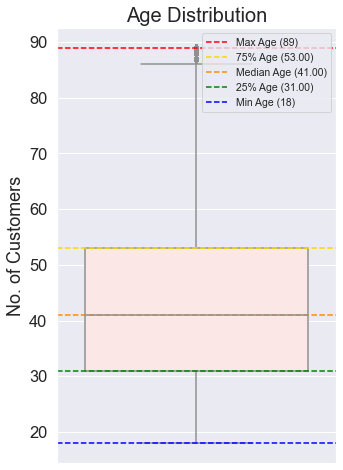

In [ ]:
fig, ax = plt.subplots(figsize=(5,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(y=data["Age"], color="mistyrose")
ax.axhline(y=data['Age'].max(), linestyle='--',color='red', label=f'Max Age ({data.Age.max()})')
ax.axhline(y=data['Age'].describe()[6], linestyle='--',color='gold', label=f'75% Age ({data.Age.describe()[6]:.2f})')
ax.axhline(y=data['Age'].median(), linestyle='--',color='darkorange', label=f'Median Age ({data.Age.median():.2f})')
ax.axhline(y=data['Age'].describe()[4], linestyle='--',color='green', label=f'25% Age ({data.Age.describe()[4]:.2f})')
ax.axhline(y=data['Age'].min(), linestyle='--',color='blue', label=f'Min Age ({data.Age.min()})')
ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('No. of Customers')

plt.title('Age Distribution', fontsize = 20)
plt.show()

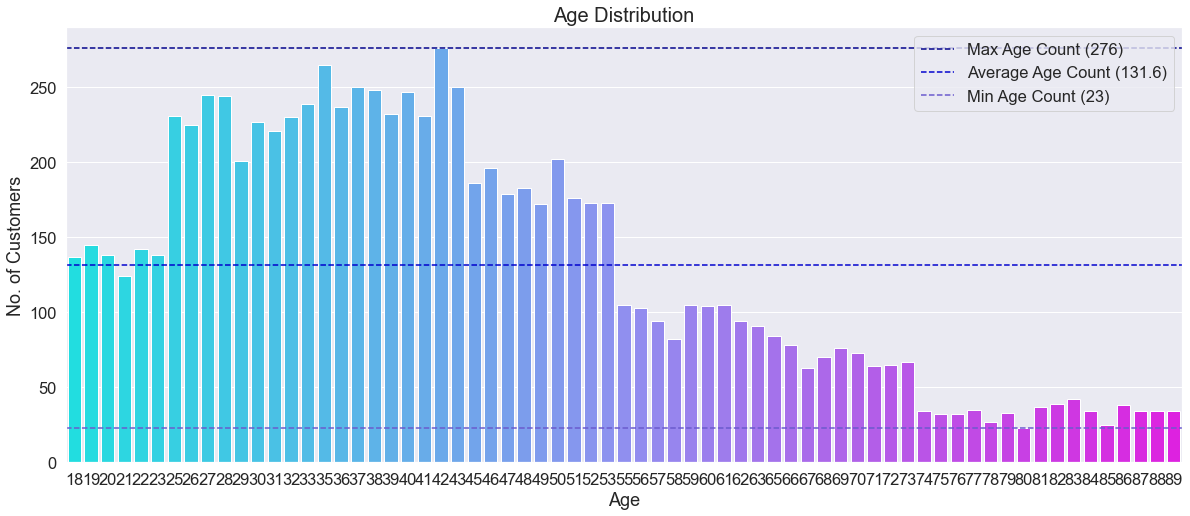

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.5)
ax = sns.countplot(x=data['Age'], palette='cool')
ax.axhline(y=data['Age'].value_counts().max(), linestyle='--',color='darkblue', label=f'Max Age Count ({data.Age.value_counts().max()})')
ax.axhline(y=data['Age'].value_counts().mean(), linestyle='--',color='mediumblue', label=f'Average Age Count ({data.Age.value_counts().mean():.1f})')
ax.axhline(y=data['Age'].value_counts().min(), linestyle='--',color='slateblue', label=f'Min Age Count ({data.Age.value_counts().min()})')
ax.legend(loc ='upper right')
ax.set_ylabel('No. of Customers')

plt.title('Age Distribution', fontsize = 20)
plt.show()

Profession Data Visualisation

C:\Users\meets\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profession', ylabel='count'>

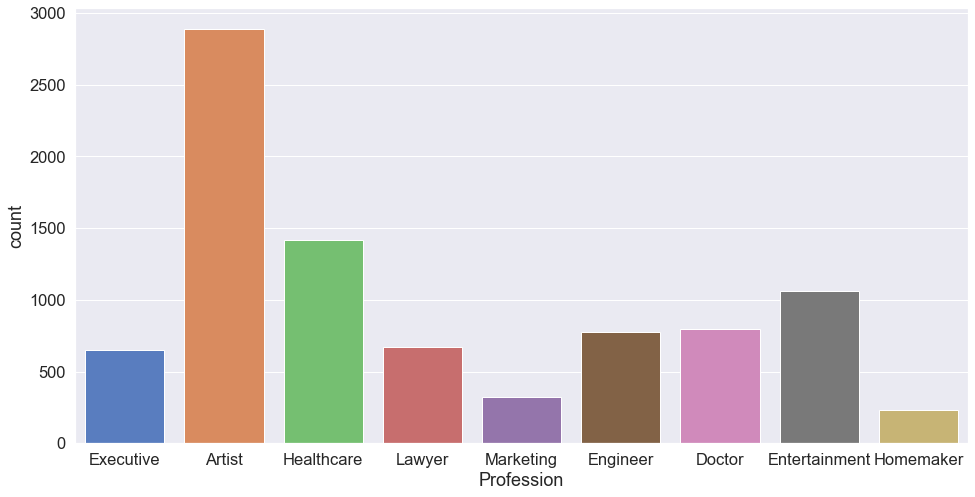

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(data.Profession,palette='muted')

In [ ]:
profession=pd.get_dummies(data.Profession)
data.drop(['Profession'],axis=1,inplace=True)
data=data.join(profession)

Graduated Data Visualisation

C:\Users\meets\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Graduated', ylabel='count'>

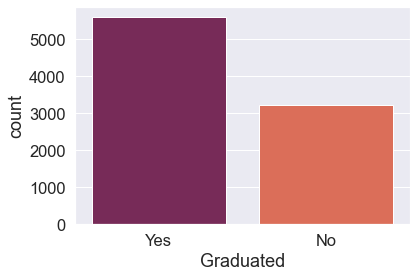

In [ ]:
sns.countplot(data.Graduated,palette='rocket')

In [ ]:
data.Graduated=pd.Categorical(data.Graduated,categories=['No','Yes'],ordered=True).codes

Spending Score Visualisation

C:\Users\meets\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spending_Score', ylabel='count'>

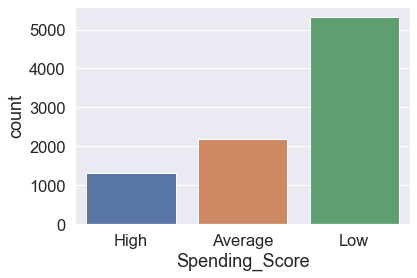

In [ ]:
sns.countplot(data.Spending_Score)

In [ ]:
data.Spending_Score=pd.Categorical(data.Spending_Score,categories=['Low','Average','High'],ordered=True).codes

Var_1 Visualisation

C:\Users\meets\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Var_1', ylabel='count'>

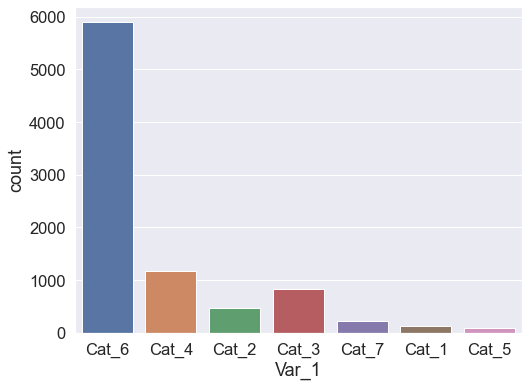

In [ ]:
#Var_1 is income range attribute with var_1 being the highest paid and Var_6 being the lowest paid

plt.figure(figsize=(8,6))
sns.countplot(data.Var_1)

In [ ]:
data.Var_1=pd.Categorical(data.Var_1).codes

Marital Status Data Visualisation

C:\Users\meets\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ever_Married', ylabel='count'>

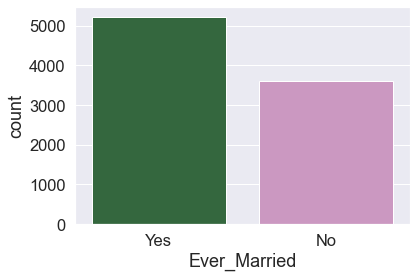

In [ ]:
sns.countplot(data.Ever_Married,palette='cubehelix')

In [ ]:
data.Ever_Married=pd.Categorical(data.Ever_Married,categories=['No','Yes'],ordered=True).codes

Work Experience Data Visualisation

(array([5729.,  337.,  631.,  248.,  242.,  771.,  569.,  121.,   55.,
         116.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <BarContainer object of 10 artists>)

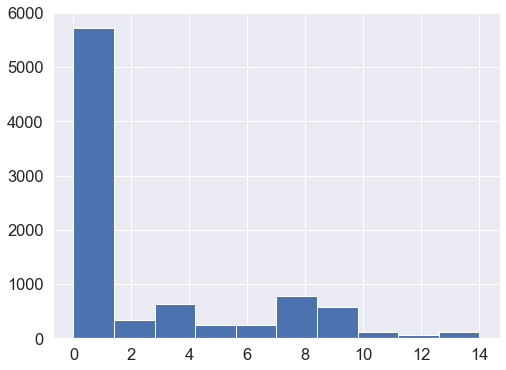

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(data.Work_Experience)

label=pd.Categorical(data.Segmentation,categories=['A','B','C','D']).codes
data.drop(['Segmentation'],axis=1,inplace=True)
label

In [ ]:
correlation_data=pd.DataFrame(data)
correlation_data.drop(['ID'],axis=1,inplace=True)
correlation_data

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,0,1,61,1,1.0,2,3.0,5,0,0,0,0,1,0,0,0,0
1,1,1,63,1,0.0,2,5.0,5,0,0,0,0,1,0,0,0,0
2,0,1,39,1,0.0,1,3.0,5,1,0,0,0,0,0,0,0,0
3,0,0,23,0,1.0,0,4.0,5,0,0,0,0,0,1,0,0,0
4,0,0,18,0,7.0,0,4.0,5,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10690,1,1,43,1,0.0,1,2.0,5,1,0,0,0,0,0,0,0,0
10691,1,0,31,1,1.0,0,4.0,5,1,0,0,0,0,0,0,0,0
10692,0,0,22,0,1.0,0,3.0,5,1,0,0,0,0,0,0,0,0
10693,1,1,66,1,0.0,1,3.0,5,0,0,1,0,0,0,0,0,0


<AxesSubplot:>

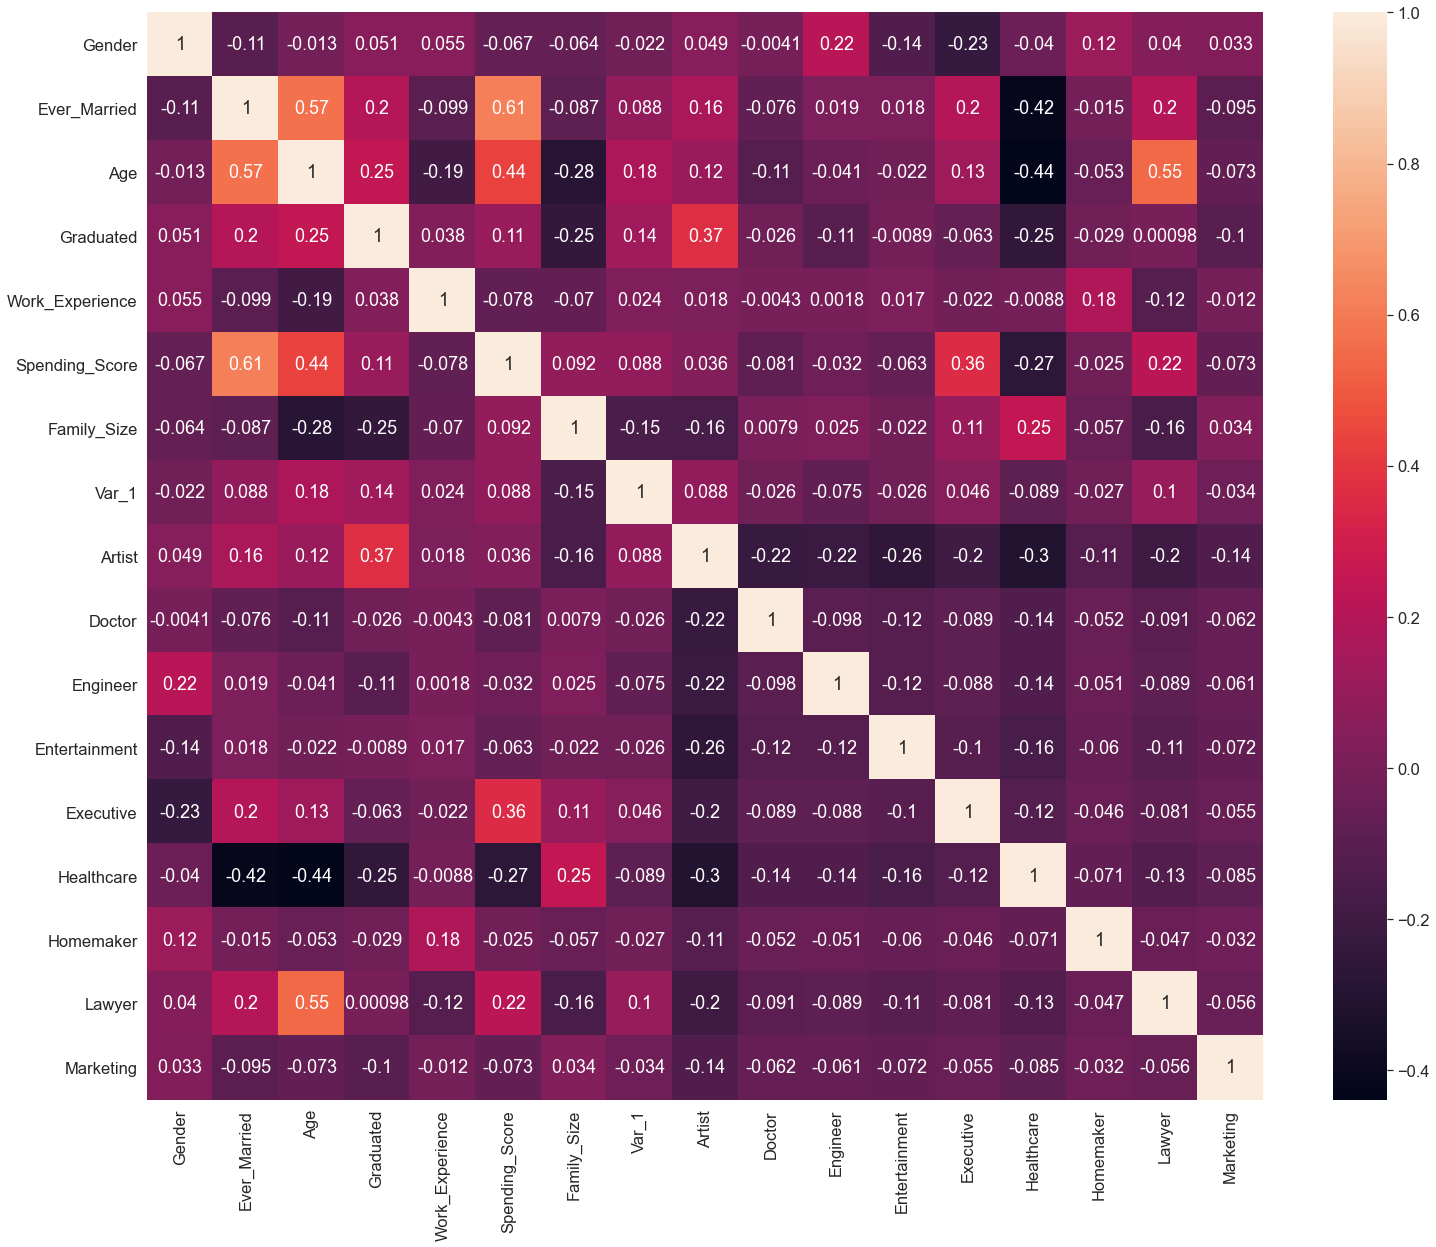

In [ ]:
plt.figure(figsize=(25,20))
sns.heatmap(correlation_data.corr(),annot=True)